#Documentation

---

## Glossary

* **Receipt**: A scanned document image representing a purchase proof (typically small-format, noisy, varied layouts).
* **Authentic (real) receipt**: A receipt that has **not** undergone a fraudulent change intended to alter its meaning (even if it contains benign notes/marks). ([l3i-share.univ-lr.fr][1])
* **Forged receipt**: A receipt image (and its paired transcription) that has undergone a **fraudulent modification** intended to change key information (e.g., totals, dates, products). ([l3i-share.univ-lr.fr][1])
* **Forgery / fraudulent modification**: Any intentional alteration that compromises the document’s semantic integrity (e.g., changing amounts/dates) and is labeled as “forged” in ground truth. ([l3i-share.univ-lr.fr][1])
* **Digital annotation**: A non-fraudulent digital mark/insert present in some original receipts (e.g., added numbers/names). These are **not** forgeries. ([l3i-share.univ-lr.fr][1])
* **Handwritten (manual) annotation**: A non-fraudulent handwritten note/marking on an original receipt (words, checkmarks, highlights, underlines, stamps). These are **not** forgeries. ([l3i-share.univ-lr.fr][1])
* **Transcription**: The text file paired with each receipt image, originating from SROIE-style OCR/IE annotations; for forged samples, the transcription is updated to match the forged content. ([l3i-share.univ-lr.fr][1])
* **BBox (bounding box)**: A rectangular region (x, y, width, height) localizing a forged (or related “original”) area on the receipt image. ([l3i-share.univ-lr.fr][1])
* **Entity type (in forgery context)**: The semantic category of the modified content (Company, Product, Total/Payment, Metadata).
* **Original area (copy source)**: For some copy-paste forgeries, annotators may also label the *source* region that was copied.

---

## Dataset overview

**Find it again!** is a receipt forgery detection dataset built from scanned receipts and transcriptions originally derived from SROIE (Scanned Receipt OCR and Information Extraction). It contains **988** receipt images (PNG) with paired text transcriptions; **163** of these receipts were manually modified to create **pseudo-realistic forgeries**, and the dataset provides ground-truth labels plus detailed spatial/semantic annotations for the forged regions. ([l3i-share.univ-lr.fr][1])

### Design goals

The dataset is intended to support both:

* **Image-based forgery detection/localization** (visual artifacts, region localization), and
* **Content-based / text-based forgery detection** (semantic plausibility, text-image consistency, entity-level reasoning). ([l3i-share.univ-lr.fr][1])

---

## Data origin and creation process

### Source dataset: SROIE

The receipts originate from the SROIE competition dataset, created with **1000** scanned receipt images and annotations for OCR and information extraction tasks. ([arXiv][2])

### Forgery campaign

To generate realistic forged examples, the creators organized “forgery workshops” with **19 participants**, producing forged images and updating their corresponding transcriptions. Multiple editing tools were used across documents, including Preview, Paint, Paint3D, GIMP, and Kolourpaint (counts reported per tool in the paper).

### Annotation and post-processing

* For forged receipts, participants annotated modified regions using **rectangular boxes** and labeled forgery type + entity type.
* All forged-receipt annotations are **manual**, and the authors performed additional **manual correction/normalization** to improve consistency.

---

## Dataset splits and class distribution

The dataset is pre-split into **train / validation / test** for standardized benchmarking.

### Split statistics (including real vs forged)

| Split      | Total receipts |  Forged | Real (authentic) |
| ---------- | -------------: | ------: | ---------------: |
| Train      |            577 |      94 |              483 |
| Validation |            193 |      34 |              159 |
| Test       |            218 |      35 |              183 |
| **Total**  |        **988** | **163** |          **825** |

Counts are taken from the dataset publication’s split table; real = total − forged.

### Additional (non-forgery) annotation flags in authentic receipts

The dataset also tracks (for authentic receipts) whether they contain:

* **digital annotations** (total: 54), and/or
* **manual annotations** (total: 500).

These are explicitly stated to be **not forgeries**. ([l3i-share.univ-lr.fr][1])

---

## Directory structure

The official dataset is organized as follows: ([l3i-share.univ-lr.fr][1])

```
dataset/
├── train/
│   ├── <receipt_id>.png
│   ├── <receipt_id>.txt
│   └── ...
├── val/
│   ├── <receipt_id>.png
│   ├── <receipt_id>.txt
│   └── ...
├── test/
│   ├── <receipt_id>.png
│   ├── <receipt_id>.txt
│   └── ...
├── train.txt
├── val.txt
└── test.txt
```

* Each subset folder contains the **PNG image** and its paired **transcription TXT** with the same base filename. ([l3i-share.univ-lr.fr][1])
* The `train.txt`, `val.txt`, `test.txt` files list the filenames and ground-truth metadata (and, for forged items, the JSON annotations). ([l3i-share.univ-lr.fr][1])

---

## Index files (`train.txt`, `val.txt`, `test.txt`) and labels

In the released dataset, the split index files are **CSV-like text files** (often `.txt` but comma-separated), containing at least:

* image filename
* boolean flags for `digital annotation` and `handwritten annotation`
* a boolean/label for `forged`
* and (when forged) a JSON blob describing region annotations (“forgery annotations”). ([l3i-share.univ-lr.fr][1])

You also observed (from the dataset you have locally) headers consistent with:
`image, digital annotation, handwritten annotation, forged, forgery annotations`
—which matches the official description of what those index files contain. ([l3i-share.univ-lr.fr][1])

---

## Forgery annotations format (JSON / VIA-style)

For forged receipts, the dataset provides region-level annotations in JSON format compatible with the **VGG Image Annotator (VIA)** style.

A typical annotation object includes:

* `filename`, `size`
* `regions`: list of rectangles with:

  * `shape_attributes`: `{ name: "rect", x, y, width, height }`
  * `region_attributes`:

    * `Modified area`: one (or more) forgery-type flags
    * `Entity type`: semantic category of what was modified
    * `Original area`: `"no"` for modified areas; `"yes"` for copy-source regions (when present)
* `file_attributes`: may include `Software used` and an optional `Comment` ([l3i-share.univ-lr.fr][1])

### Important note: modified vs original regions

Not every annotated region is necessarily a *modified* region: for copy-paste forgeries, some regions can denote the **original source area**. The official page recommends checking `Original area: "yes"` (or the modification type) to rule these out when you only want tampered regions. ([l3i-share.univ-lr.fr][1])

Also, not all copy-source regions are annotated: the authors report that only **200 original areas** were retained/available compared to **356 CPI areas**, due to missing/erroneous annotations during cleanup.

---

## Forgery-type taxonomy (per modified region)

Each forged region can be labeled with one or more modification types:

* **CPI**: Copy and paste *inside* the same document.
* **CPO**: Copy and paste *outside* (from another document).
* **IMI**: Text insertion using a text tool imitating the font (replace/add text).
* **CUT**: Delete characters without replacing them.
* **PIX**: Freehand pixel-level modification (e.g., adding a stroke to turn one character into another).
* **Other**: Filters or other unspecified operations.

A single area may have multiple types (e.g., CPI + PIX).

### Dataset-level modification statistics

Across the **163 forged receipts**, the authors report **455 modified areas** in total, and the following counts by modification type:

* CPI: 353
* IMI: 36
* CUT: 36
* PIX: 33
* CPO: 10

---

## Entity types (what was modified)

For each modified region, the dataset annotates which semantic field was altered:

* **Company**: company/contact details (address, phone, name)
* **Product**: product line info (name, price, add/remove product)
* **Total/Payment**: totals, payment method, amount paid
* **Metadata**: date, time

Dataset-level counts (over modified areas) reported in the paper:

* Total/Payment: 234
* Product: 95
* Metadata: 82
* Company: 26
* Other: 18

---

## Notes on “digital” and “handwritten” annotations (non-forgery)

A key nuance of Find it again! is that some **authentic** receipts contain marks that look like tampering (e.g., handwritten notes, highlights, inserted numbers), but are *not* fraud. The dataset explicitly models this with `digital annotation` and `handwritten annotation` flags. ([l3i-share.univ-lr.fr][1])

The paper also notes:

* digital annotations tend to be reflected in transcriptions,
* handwritten annotations generally are not.

This is useful if you want to:

* treat these as “hard negatives,”
* study robustness (avoid confusing benign marks with fraud),
* or build multi-task systems (forgery detection + benign-annotation detection).

---

## Recommended uses in ML / document forensics

**Core tasks supported**

1. **Binary classification**: forged vs authentic (using `forged` ground truth).
2. **Forgery localization**: detect/segment forged regions using annotated bboxes. ([l3i-share.univ-lr.fr][1])
3. **Forgery-type classification**: CPI/CPO/IMI/CUT/PIX per region.
4. **Semantic (entity) classification**: predict which entity type was modified.
5. **Text-only / multimodal consistency checks**: use transcriptions alone or combined with image signals to detect implausible edits. ([l3i-share.univ-lr.fr][1])

**Important experimental constraint**
Use the provided train/val/test split to keep comparisons consistent with published baselines and reported distributions.

---

## Licensing and citation

* The dataset’s official page does not visibly state a license in the HTML content we can retrieve; verify license terms inside the downloaded archive or accompanying documentation. ([l3i-share.univ-lr.fr][1])
* A related publication version is explicitly distributed under **Attribution 4.0 International (CC BY 4.0)** (this statement applies to that paper).

---

[1]: https://l3i-share.univ-lr.fr/2023Finditagain/index.html "Find it again! - Receipt Dataset for Document Forgery Detection"
[2]: https://arxiv.org/abs/2103.10213 "[2103.10213] ICDAR2019 Competition on Scanned Receipt OCR and Information Extraction"


#Config

In [3]:
from __future__ import annotations

from pathlib import Path
from typing import Any, Dict, Iterable, Literal, Optional, Tuple

import requests
import zipfile
import os
import sys
import numpy as np
import pandas as pd
from PIL import Image
import cv2

In [4]:
INP_DIR = Path("/content/dataset")
INP_DIR.mkdir(parents=True, exist_ok=True)

OUT_DIR = Path("/content/output")
OUT_DIR.mkdir(parents=True, exist_ok=True)

URL = "http://l3i-share.univ-lr.fr/2023Finditagain/findit2.zip"

DATASET_ROOT = INP_DIR / "findit2"
SPLITS = ["train", "val", "test"]

In [5]:
S_LINE = (25*"-")
M_LINE = (50*"-")
L_LINE = (100*"-")
S_DIV = (25*"=")
M_DIV = (50*"=")
L_DIV = (100*"=")

#Auxiliar


In [6]:
def df_info(df, nombre="DataFrame"):
    """
    Displays summarized and nicely formatted information about a pandas DataFrame.

    Parameters:
    df : pandas.DataFrame
        The DataFrame to analyze.
    nombre : str
        Descriptive name or title of the DataFrame.
    """
    # Detect whether we are in an IPython environment (Jupyter)
    in_ipython = 'ipykernel' in sys.modules

    # Decorators
    SEP_MAIN = "=" * 60
    SEP_SUB = "-" * 60

    # Function to show data (uses display if available, otherwise print)
    def mostrar(obj):
        if in_ipython:
            from IPython.display import display
            display(obj)
        else:
            print(obj.to_string() if hasattr(obj, 'to_string') else obj)

    # Main header
    print(SEP_MAIN)
    print(f"{nombre:^60}")  # Centered
    print(SEP_MAIN)

    # Basic information
    print(f"Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
    print(SEP_SUB)

    # Data types
    dtypes_count = df.dtypes.value_counts()
    dtypes_str = ", ".join([f"{k.name}: {v}" for k, v in dtypes_count.items()])
    print(f"Data types: {dtypes_str}")

    # Null values
    nulos = df.isnull().sum()
    if nulos.sum() > 0:
        print("Null values per column:")
        for col, num in nulos[nulos > 0].items():
            print(f"  - {col}: {num} ({num/len(df)*100:.1f}%)")
    else:
        print("No null values.")
    print(SEP_SUB)

    # First rows
    print("First 5 rows:")
    mostrar(df.head())
    print(SEP_SUB)

    # Descriptive statistics (includes all columns)
    print("Descriptive statistics:")
    mostrar(df.describe(include='all'))
    print(SEP_SUB)

    # (Optional) Additional compact information: memory usage
    mem_usage = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory usage: {mem_usage:.2f} MB")

    # Footer
    print(SEP_MAIN)


#Load

In [7]:
URL = "http://l3i-share.univ-lr.fr/2023Finditagain/findit2.zip"
COMPRESSED = INP_DIR / "findit2.zip"
EXTRACTED = INP_DIR

print(f"Downloading {URL}...")

response = requests.get(URL, stream=True, timeout=60)

if response.status_code == 200:
    with open(COMPRESSED, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download complete.")
else:
    print(f"Error downloading file. Status code: {response.status_code}.")
    exit()

if os.path.getsize(COMPRESSED) == 0:
    print("Error: The downloaded file is empty.")
    exit()

print(f"Extracting in {INP_DIR}...")
try:
    with zipfile.ZipFile(COMPRESSED, 'r') as zip_ref:
        zip_ref.extractall(INP_DIR)
    print("Extraction complete.")
except zipfile.BadZipFile:
    print("Error: The downloaded file is not a valid ZIP or is corrupt.")
    exit()

# 5. (Opcional) Limpiar: eliminar el archivo zip después de descomprimirlo
os.remove(COMPRESSED)
print("Temporary ZIP file deleted.")

print("\nLoading complete.")

Download complete.
Extracting in /content/dataset...
Extraction complete.
Temporary ZIP file deleted.

Loading complete.


#Exploration

In [8]:
from __future__ import annotations

from pathlib import Path
from typing import Any, Dict, Iterable, Literal, Optional, Tuple

import pandas as pd
from PIL import Image
import cv2
import numpy as np

METADATA_FIELDS: Tuple[str, ...] = (
    "format",
    "mode",
    "bytes",
    "width",
    "height",
    "horizontal_resolution",
    "vertical_resolution",
    "bit_depth",
    "aspect_ratio",
    "has_alpha",
    "exif_orientation",
    "blur_laplacian_var",
    "brightness_mean",
    "contrast_std",
    "brightness_min",
    "brightness_max",
)


def _infer_bit_depth(mode: str, pil_info: Dict[str, Any]) -> Optional[int]:
    """
    Infer total bit depth (not per-channel) similarly to the notebook logic.

    Notes:
        - If Pillow provides an explicit 'bitdepth' entry, we use it.
        - Otherwise we infer by common image modes.
        - This is intended to match the notebook's semantics (e.g., RGB->24, RGBA->32).
    """
    bitdepth = pil_info.get("bitdepth")
    if isinstance(bitdepth, int):
        return bitdepth

    mode_map = {
        "1": 1,
        "L": 8,
        "P": 8,
        "I;16": 16,
        "I;16B": 16,
        "I;16L": 16,
        "I": 32,
        "F": 32,
        "RGB": 24,
        "RGBA": 32,
        "LA": 16,
        "CMYK": 32,
    }
    return mode_map.get(mode)


def _extract_dpi(pil_info: Dict[str, Any]) -> Tuple[Optional[float], Optional[float]]:
    """
    Extract DPI in a robust way.

    Priority:
      1) 'dpi' if present (tuple of floats/ints).
      2) Convert from PNG 'pHYs' chunk if present (pixels per meter -> DPI).

    Returns:
        (horizontal_dpi, vertical_dpi) as floats, or (None, None) if unavailable.
    """
    dpi = pil_info.get("dpi")
    if isinstance(dpi, (tuple, list)) and len(dpi) >= 2:
        try:
            return float(dpi[0]), float(dpi[1])
        except Exception:
            pass

    phys = pil_info.get("pHYs")
    # Pillow may store pHYs in different shapes depending on version.
    # We handle the common case: (ppux, ppuy, unit) where unit==1 means pixels/meter.
    if isinstance(phys, (tuple, list)) and len(phys) >= 3:
        ppux, ppuy, unit = phys[0], phys[1], phys[2]
        try:
            if int(unit) == 1:
                # pixels per meter -> DPI
                return float(ppux) / 39.3701, float(ppuy) / 39.3701
        except Exception:
            pass

    return None, None


def visual_analysis(path: str) -> dict:
    """
    Retorna stats (mean/std/min/max) para brightness, contrast y blur.
    - brightness: stats de intensidades en escala de grises [0..255]
    - contrast:   misma intensidad, pero además se reporta std como "contraste global"
    - blur:       varianza del Laplaciano (en float32)
    """
    # Leer en GRAYSCALE directo (más rápido que leer RGB y convertir)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"No pude leer la imagen: {path}")

    # Brightness/Contrast stats
    img_f = img.astype(np.float32)
    brightness_mean = float(img_f.mean())
    contrast_std  = float(img_f.std())
    brightness_min  = float(img_f.min())
    brightness_max  = float(img_f.max())

    # Blur — Laplacian Variace
    lap = cv2.Laplacian(img_f, ddepth=cv2.CV_32F, ksize=3)
    blur_val = float(lap.var())


    return {
        "blur_laplacian_var": blur_val,
        "brightness_mean": brightness_mean,
        "contrast_std": contrast_std,
        "brightness_min": brightness_min,
        "brightness_max": brightness_max
        }


def extract_png_metadata(png_path: str | Path) -> Dict[str, Any]:
    """
    Extract metadata from a PNG image, matching the notebook's output fields.

    This function does NOT return an 'error' field. If an exception occurs,
    it will be raised to the caller.

    Args:
        png_path: Path to the PNG image.

    Returns:
        A dict containing:
            - format (str | None)
            - mode (str | None)
            - bytes (int)
            - width (int)
            - height (int)
            - horizontal_resolution (float | None)  # DPI
            - vertical_resolution (float | None)    # DPI
            - bit_depth (int | None)                # total bit depth (e.g., RGB=24)
            - aspect_ratio (float | None)
            - has_alpha (bool)
            - exif_orientation (int | None)
            - blur_laplacian_var (float)
            - brightness_mean (float)
            - contrast_std (float)
            - brightness_min (float)
            - brightness_max (float)
    """
    p = Path(png_path)

    # File size (bytes) without loading pixels.
    file_size = p.stat().st_size

    with Image.open(p) as img:
        width, height = img.size
        mode = img.mode
        fmt = img.format
        info = dict(img.info)  # shallow copy to avoid side effects

        hdpi, vdpi = _extract_dpi(info)
        bit_depth = _infer_bit_depth(mode, info)

        has_alpha = ("A" in img.getbands()) if hasattr(img, "getbands") else (mode in ("RGBA", "LA"))

        # EXIF orientation tag is 274. For most PNGs it's absent, but we keep parity with notebook.
        exif_orientation = None
        try:
            exif = img.getexif()
            exif_orientation = exif.get(274) if exif else None
        except Exception:
            exif_orientation = None

    aspect_ratio = (width / height) if (width and height) else None

    vdata = visual_analysis(png_path)

    return {
        "format": fmt,
        "mode": mode,
        "bytes": file_size,
        "width": width,
        "height": height,
        "horizontal_resolution": hdpi,
        "vertical_resolution": vdpi,
        "bit_depth": bit_depth,
        "aspect_ratio": aspect_ratio,
        "has_alpha": bool(has_alpha),
        "exif_orientation": exif_orientation,
        "blur_laplacian_var": vdata["blur_laplacian_var"],
        "brightness_mean": vdata["brightness_mean"],
        "contrast_std": vdata["contrast_std"],
        "brightness_min": vdata["brightness_min"],
        "brightness_max": vdata["brightness_max"],
    }

In [9]:
def get_data(
    csv_path: str | Path,
    images_dir: str | Path | None = None,
    output_csv_path: str | Path | None = None,
    *,
    sep: str = ",",
    quotechar: str = '"',
    engine: str = "python",
    on_error: Literal["raise", "warn", "ignore"] = "warn",
) -> pd.DataFrame:
    """
    Load a dataset split CSV/TXT and enrich it with per-image PNG metadata.

    This function assumes the split file includes an 'image' column with PNG filenames.
    By default, it infers the images directory as: <csv_parent>/<csv_stem>/.
    Example:
        /content/findit2/findit2/train.txt  -> images in /content/findit2/findit2/train/

    Args:
        csv_path: Path to split file (train.txt/test.txt/val.txt). It is CSV-formatted.
        images_dir: Directory where the PNG images live. If None, inferred from csv_path.
        output_csv_path: Where to save the enriched CSV. If None, uses:
                         <csv_parent>/<csv_stem>_with_metadata.csv
        sep: CSV separator.
        quotechar: Quote character.
        engine: Pandas CSV parsing engine (python is robust for complex quoted strings).
        on_error:
            - "raise": propagate errors when a PNG cannot be read.
            - "warn": print a warning and fill metadata with None for that image.
            - "ignore": silently fill metadata with None for that image.

    Returns:
        A pandas DataFrame with original columns + one column per metadata field.
    """
    csv_path = Path(csv_path)
    if images_dir is None:
        images_dir = csv_path.parent / csv_path.stem
    images_dir = Path(images_dir)

    if output_csv_path is None:
        output_csv_path = OUT_DIR / f"{csv_path.stem}_data.csv"
    output_csv_path = Path(output_csv_path)

    # Read the split CSV/TXT.
    df = pd.read_csv(csv_path, sep=sep, quotechar=quotechar, engine=engine)

    if "image" not in df.columns:
        raise ValueError(f"Expected an 'image' column in {csv_path}, but columns are: {list(df.columns)}")

    flags = ['digital annotation', 'handwritten annotation', 'forged']
    for col in flags:
      df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int8")
      df[col] = df[col].astype(bool)

    # Extract metadata row-by-row (preserves row order).
    meta_rows: list[Dict[str, Any]] = []
    for filename in df["image"].astype(str).tolist():
        png_file = images_dir / filename

        try:
            meta = extract_png_metadata(png_file)
        except Exception as e:
            if on_error == "raise":
                raise
            if on_error == "warn":
                print(f"[WARN] Could not read PNG metadata for: {png_file} -> {type(e).__name__}: {e}")
            meta = {k: None for k in METADATA_FIELDS}

        meta_rows.append(meta)

    meta_df = pd.DataFrame(meta_rows)
    out_df = pd.concat([df.reset_index(drop=True), meta_df.reset_index(drop=True)], axis=1)

    out_df.columns.str.replace(' ', '_')

    out_df.to_csv(output_csv_path, index=False)
    return out_df

In [10]:
train_data = get_data(DATASET_ROOT / "train.txt")
test_data  = get_data(DATASET_ROOT / "test.txt")
val_data   = get_data(DATASET_ROOT / "val.txt")

[WARN] Could not read PNG metadata for: /content/dataset/findit2/val/X51006619709.png -> FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/findit2/val/X51006619709.png'


In [11]:
display(train_data)
display(test_data)
display(val_data)

,image,digital annotation,handwritten annotation,forged,forgery annotations,format,mode,bytes,width,height,...,vertical_resolution,bit_depth,aspect_ratio,has_alpha,exif_orientation,blur_laplacian_var,brightness_mean,contrast_std,brightness_min,brightness_max
0,X00016469622.png,True,True,True,"{'filename': 'X00016469622.png', 'size': 23072...",PNG,RGBA,230726,461,933,...,149.9870,32,0.494105,True,NaN,25932.201172,245.973648,33.375046,0.0,255.0
1,X00016469623.png,True,True,False,0,PNG,RGB,402571,463,1026,...,149.9870,24,0.451267,False,NaN,10912.718750,245.978134,24.791536,0.0,255.0
2,X00016469670.png,True,True,False,0,PNG,RGB,293119,463,894,...,149.9870,24,0.517897,False,NaN,42662.074219,240.523804,43.479557,0.0,255.0
3,X00016469671.png,True,True,False,0,PNG,RGB,239186,463,776,...,149.9870,24,0.596649,False,NaN,39481.199219,241.794708,41.313652,0.0,255.0
4,X00016469672.png,True,True,False,0,PNG,RGB,394694,457,1170,...,149.9870,24,0.390598,False,NaN,50552.421875,240.079010,44.438766,0.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,X51009453801.png,True,False,False,0,PNG,RGB,305080,583,1303,...,NaN,24,0.447429,False,NaN,3288.080322,251.374115,14.564886,0.0,255.0
573,X51009453804.png,True,True,False,0,PNG,RGB,294131,619,875,...,NaN,24,0.707429,False,NaN,11233.620117,246.364944,30.500761,0.0,255.0
574,X51009568881.png,False,False,False,0,PNG,L,416811,884,1678,...,NaN,8,0.526818,False,NaN,2219.171143,222.616425,34.592480,0.0,255.0
575,X51006619709.png,False,False,False,"{'filename': 'X51006619709.png', 'size': 10218...",PNG,RGBA,1021836,884,2822,...,287.9852,32,0.313253,True,NaN,1862.532715,230.288300,26.583149,0.0,255.0


,image,digital annotation,handwritten annotation,forged,forgery annotations,format,mode,bytes,width,height,...,vertical_resolution,bit_depth,aspect_ratio,has_alpha,exif_orientation,blur_laplacian_var,brightness_mean,contrast_std,brightness_min,brightness_max
0,X00016469619.png,True,True,False,0,PNG,RGB,288065,439,1004,...,149.9870,24,0.437251,False,NaN,9308.364258,248.219818,24.106190,0.0,255.0
1,X00016469620.png,True,True,False,0,PNG,RGB,301022,459,949,...,149.9870,24,0.483667,False,NaN,46114.941406,241.220306,41.311413,0.0,255.0
2,X00016469669.png,True,True,False,0,PNG,RGB,229332,463,605,...,149.9870,24,0.765289,False,NaN,34656.566406,240.558365,41.572018,0.0,255.0
3,X00016469676.png,True,True,False,0,PNG,RGB,212145,463,797,...,149.9870,24,0.580928,False,NaN,39250.179688,243.816345,37.360661,0.0,255.0
4,X51005230616.png,False,True,True,"{'filename': 'X51005230616.png', 'size': 83540...",PNG,RGBA,835401,524,1830,...,119.9896,32,0.286339,True,NaN,17216.542969,238.996155,42.332245,0.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,X51008142059.png,False,False,False,0,PNG,L,357388,932,2211,...,95.9866,8,0.421529,False,NaN,5508.301758,240.962555,37.821125,0.0,255.0
214,X51008145504.png,False,False,False,0,PNG,RGB,420642,616,1020,...,95.9866,24,0.603922,False,NaN,14518.845703,244.115173,34.745090,0.0,255.0
215,X51008145505.png,False,False,False,0,PNG,RGB,578320,646,1267,...,NaN,24,0.509866,False,NaN,10376.119141,230.281815,63.016209,0.0,255.0
216,X51008164991.png,False,False,False,0,PNG,L,362469,790,1634,...,95.9866,8,0.483476,False,NaN,4223.292969,243.484009,26.609591,37.0,255.0


,image,digital annotation,handwritten annotation,forged,forgery annotations,format,mode,bytes,width,height,...,vertical_resolution,bit_depth,aspect_ratio,has_alpha,exif_orientation,blur_laplacian_var,brightness_mean,contrast_std,brightness_min,brightness_max
0,X00016469612.png,True,True,True,"{'filename': 'X00016469612.png', 'size': 29165...",PNG,RGBA,291659.0,463.0,1013.0,...,150.0124,32.0,0.457058,True,1.0,23084.589844,244.822861,35.624611,0.0,255.0
1,X51005200931.png,False,True,False,0,PNG,L,33453.0,992.0,1403.0,...,NaN,8.0,0.707056,False,NaN,65646.773438,250.161682,34.773403,0.0,255.0
2,X51005230605.png,False,False,False,0,PNG,RGB,1048641.0,616.0,1336.0,...,NaN,24.0,0.461078,False,NaN,13004.070312,228.645584,38.433781,0.0,255.0
3,X51005433538.png,False,True,False,0,PNG,L,74303.0,1080.0,1519.0,...,NaN,8.0,0.710994,False,NaN,21282.720703,252.837357,20.870577,0.0,255.0
4,X51005441401.png,False,True,True,"{'filename': 'X51005441401.png', 'size': 35835...",PNG,RGBA,358358.0,619.0,1131.0,...,143.9926,32.0,0.547303,True,NaN,9646.624023,248.820114,24.695303,39.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,X51008142065.png,False,False,False,0,PNG,L,416433.0,932.0,2354.0,...,95.9866,8.0,0.395922,False,NaN,5993.722168,238.330963,41.449089,0.0,255.0
189,X51008164510.png,False,False,False,0,PNG,L,183725.0,660.0,1243.0,...,NaN,8.0,0.530973,False,NaN,6300.297852,226.911469,54.430988,0.0,255.0
190,X51008164997.png,False,False,False,0,PNG,L,364674.0,795.0,1705.0,...,95.9866,8.0,0.466276,False,NaN,3583.502930,245.249313,24.730703,38.0,255.0
191,X51008164999.png,False,False,False,0,PNG,L,339287.0,791.0,1932.0,...,95.9866,8.0,0.409420,False,NaN,5461.980469,246.388474,25.764990,9.0,255.0


In [14]:
!python /content/forensic_analysis.py

ForensicAnalyzer initialized → output: /content/output/forensic

  Analyzing [FORGED]: X00016469622.png


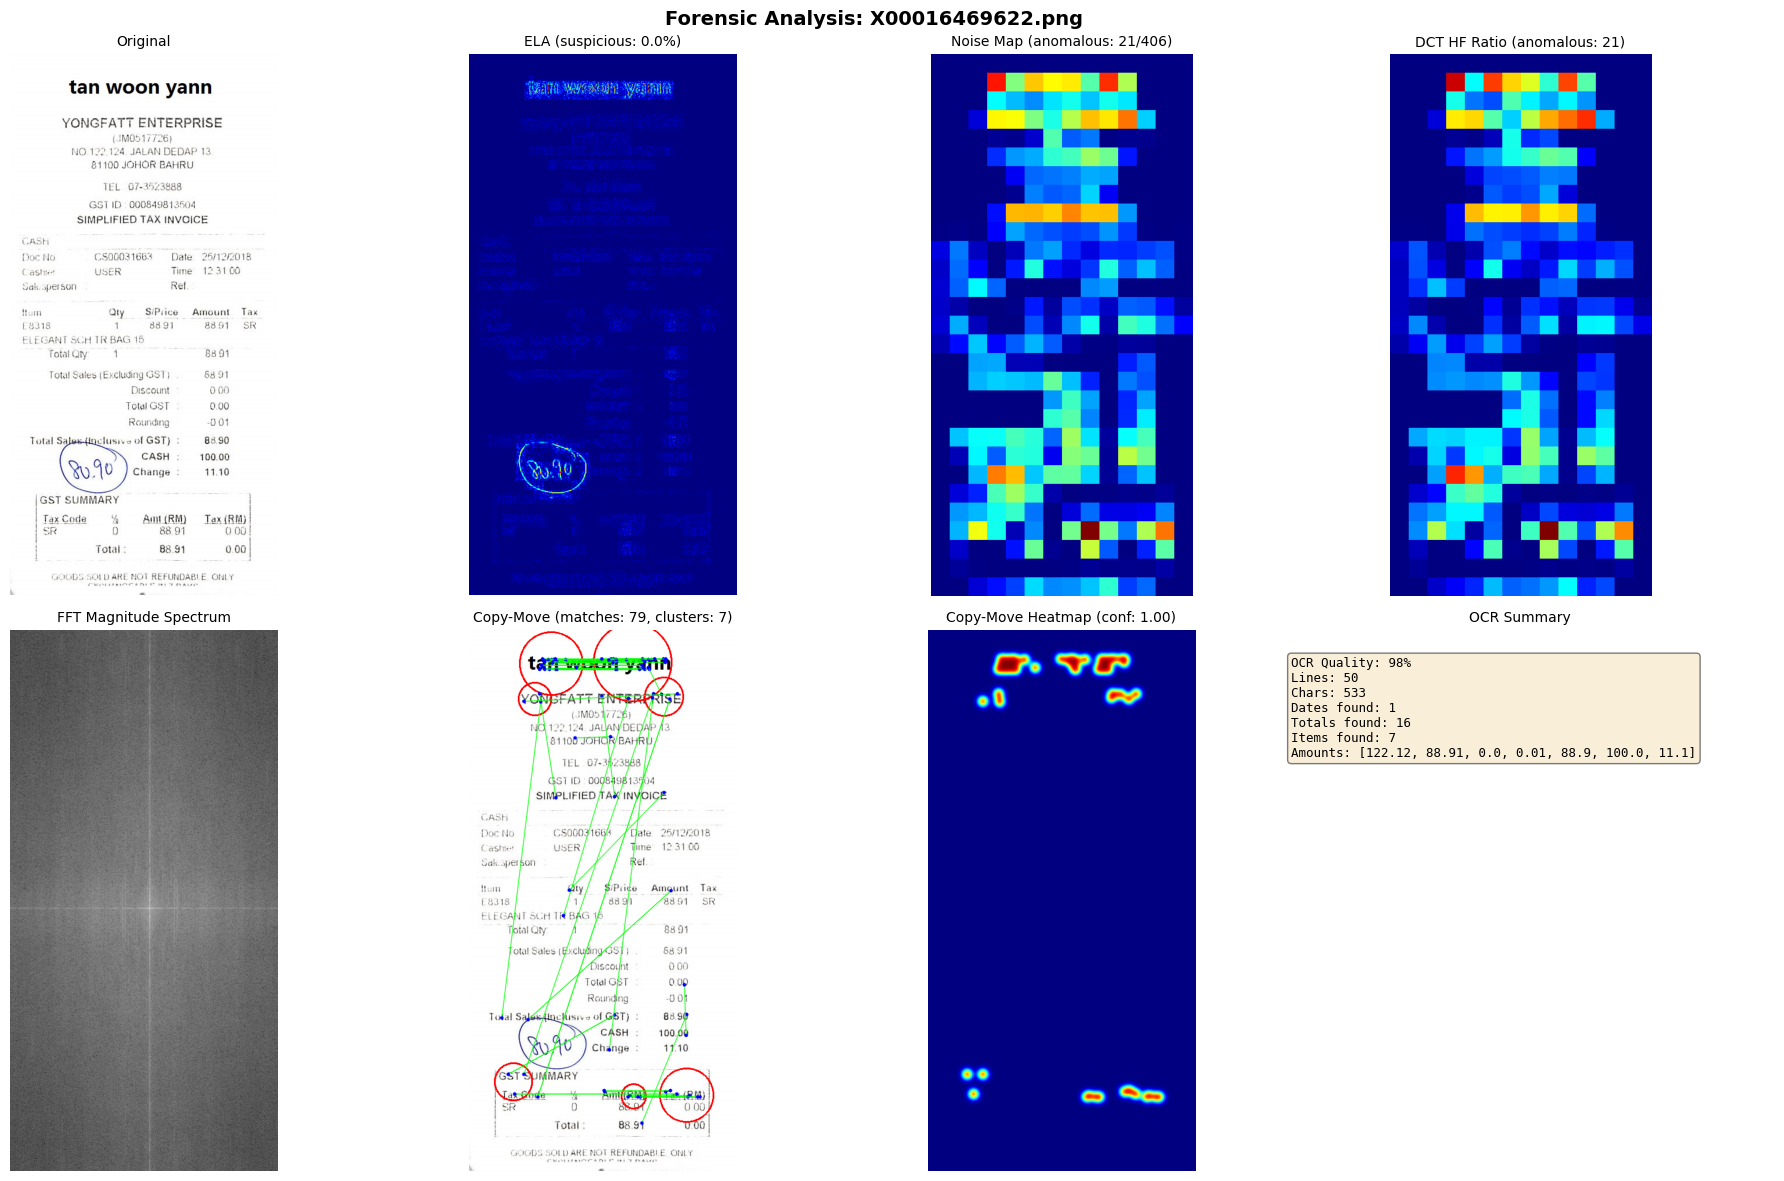


  Analyzing [REAL]: X00016469623.png


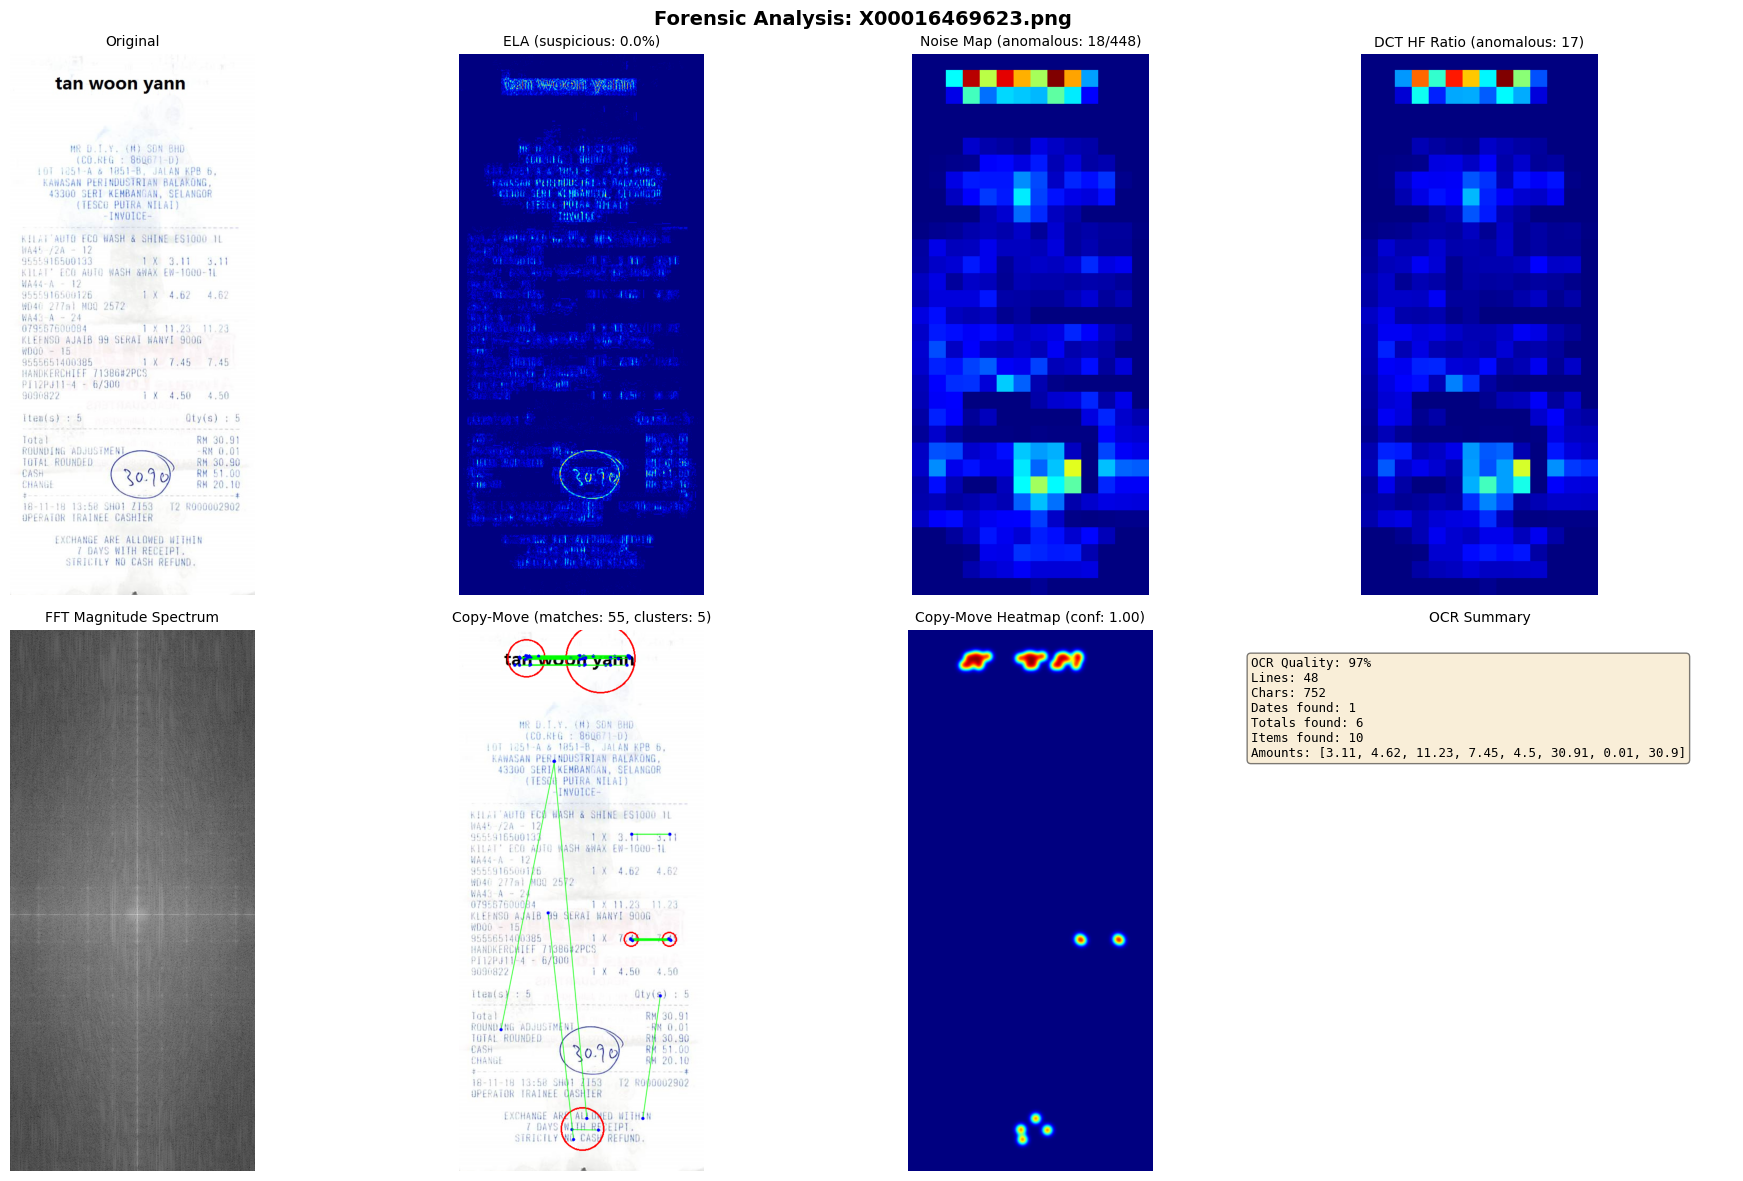

Starting batch forensic analysis on train split...
  [1/577] Processing X00016469622.png...
  [26/577] Processing X51005361906.png...
  [51/577] Processing X51005442343.png...
  [76/577] Processing X51005568885.png...
  [101/577] Processing X51005663301.png...
  [126/577] Processing X51005705759.png...
  [151/577] Processing X51005719855.png...
  [176/577] Processing X51005724628.png...
  [201/577] Processing X51005757351.png...
  [226/577] Processing X51006311714.png...
  [251/577] Processing X51006350750.png...
  [276/577] Processing X51006392313.png...


In [ ]:
"""
╔══════════════════════════════════════════════════════════════════════════════╗
║  NOTEBOOK INTEGRATION — Forensic Analysis Cells                            ║
║                                                                            ║
║  Copy these cells into your Jupyter Notebook after the "Exploration"       ║
║  section. Each cell is delimited by a comment block.                       ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""

# ═══════════════════════════════════════════════════════════════════════════
# CELL 1 — Markdown header (cell_type: markdown)
# ═══════════════════════════════════════════════════════════════════════════
"""
# Forensic Analysis

---

## Pipeline overview

Five complementary forensic extraction methods designed to amplify forgery
signals for a VLM (Qwen2.5-VL):

1. **ELA (Error Level Analysis)**: Detects regions with inconsistent JPEG
   compression artifacts — edited areas show different error levels.
2. **Noise Map**: Identifies blocks with anomalous noise variance —
   copy-paste and tool-edited regions carry a different noise profile.
3. **Frequency Analysis (DCT/FFT)**: Detects discontinuities in frequency
   domain — artificial edges and smoothed areas alter the spectral signature.
4. **Copy-Move Detection**: Finds duplicated regions within the same image
   via keypoint matching — targets CPI forgeries (~56% of all modifications).
5. **OCR Cleaning**: Normalizes noisy OCR text and extracts structured fields
   for semantic cross-verification.
"""


# ═══════════════════════════════════════════════════════════════════════════
# CELL 2 — Import and configure (cell_type: code)
# ═══════════════════════════════════════════════════════════════════════════

# If forensic_analysis.py is in /content (Colab) or current dir:
import sys
sys.path.insert(0, str(INP_DIR.parent))  # Adjust if needed

from forensic_analysis import ForensicAnalyzer, ForensicReport

# Configure output directories
FORENSIC_OUT = OUT_DIR / "forensic"
FORENSIC_OUT.mkdir(parents=True, exist_ok=True)

# Initialize analyzer with tuned parameters
analyzer = ForensicAnalyzer(
    output_dir=FORENSIC_OUT,
    # ELA: quality 95 is standard; scale 10x for visibility
    ela_quality=95,
    ela_threshold=25.0,
    ela_scale=10.0,
    # Noise: 32px blocks balance granularity vs. statistical robustness
    noise_block_size=32,
    # Frequency: 32px blocks match noise for consistent comparison
    freq_block_size=32,
    # Copy-move: tuned for receipt images (small text, repetitive patterns)
    orb_features=3000,
    match_threshold=0.70,
    min_match_distance=50.0,
    cluster_eps=40.0,
    min_cluster_size=3,
)

print(f"ForensicAnalyzer initialized → output: {FORENSIC_OUT}")


# ═══════════════════════════════════════════════════════════════════════════
# CELL 3 — Single image demo (cell_type: code)
# ═══════════════════════════════════════════════════════════════════════════

import matplotlib.pyplot as plt
from IPython.display import display

def show_forensic_report(
    report: ForensicReport,
    original_img_path: str = None,
    figsize: tuple = (20, 12),
):
    """
    Visualize all forensic analysis outputs for a single receipt.
    """
    fig, axes = plt.subplots(2, 4, figsize=figsize)
    fig.suptitle(
        f"Forensic Analysis: {Path(report.image_path).name}",
        fontsize=14, fontweight="bold",
    )

    # 1. Original image
    ax = axes[0, 0]
    if original_img_path:
        orig = cv2.imread(str(original_img_path))
        if orig is not None:
            ax.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    ax.set_title("Original", fontsize=10)
    ax.axis("off")

    # 2. ELA
    ax = axes[0, 1]
    if report.ela is not None:
        ax.imshow(cv2.cvtColor(report.ela.ela_color, cv2.COLOR_BGR2RGB))
        ax.set_title(
            f"ELA (suspicious: {report.ela.suspicious_ratio:.1%})",
            fontsize=10,
        )
    else:
        ax.set_title("ELA — error", fontsize=10)
    ax.axis("off")

    # 3. Noise map
    ax = axes[0, 2]
    if report.noise is not None:
        ax.imshow(cv2.cvtColor(report.noise.noise_color, cv2.COLOR_BGR2RGB))
        ax.set_title(
            f"Noise Map (anomalous: {report.noise.anomalous_blocks}/{report.noise.total_blocks})",
            fontsize=10,
        )
    else:
        ax.set_title("Noise Map — error", fontsize=10)
    ax.axis("off")

    # 4. DCT frequency map
    ax = axes[0, 3]
    if report.frequency is not None:
        ax.imshow(cv2.cvtColor(report.frequency.dct_color, cv2.COLOR_BGR2RGB))
        ax.set_title(
            f"DCT HF Ratio (anomalous: {report.frequency.anomalous_blocks})",
            fontsize=10,
        )
    else:
        ax.set_title("DCT — error", fontsize=10)
    ax.axis("off")

    # 5. FFT magnitude
    ax = axes[1, 0]
    if report.frequency is not None:
        ax.imshow(report.frequency.fft_magnitude, cmap="gray")
        ax.set_title("FFT Magnitude Spectrum", fontsize=10)
    else:
        ax.set_title("FFT — error", fontsize=10)
    ax.axis("off")

    # 6. Copy-move visualization
    ax = axes[1, 1]
    if report.copy_move is not None:
        ax.imshow(cv2.cvtColor(report.copy_move.visualization, cv2.COLOR_BGR2RGB))
        ax.set_title(
            f"Copy-Move (matches: {report.copy_move.num_matches}, "
            f"clusters: {report.copy_move.num_clusters})",
            fontsize=10,
        )
    else:
        ax.set_title("Copy-Move — error", fontsize=10)
    ax.axis("off")

    # 7. Copy-move heatmap
    ax = axes[1, 2]
    if report.copy_move is not None:
        ax.imshow(cv2.cvtColor(report.copy_move.match_heatmap, cv2.COLOR_BGR2RGB))
        ax.set_title(
            f"Copy-Move Heatmap (conf: {report.copy_move.confidence:.2f})",
            fontsize=10,
        )
    else:
        ax.set_title("CM Heatmap — error", fontsize=10)
    ax.axis("off")

    # 8. OCR summary
    ax = axes[1, 3]
    ax.axis("off")
    if report.ocr is not None:
        ocr_info = (
            f"OCR Quality: {report.ocr.quality_score:.0%}\n"
            f"Lines: {report.ocr.line_count}\n"
            f"Chars: {report.ocr.char_count}\n"
            f"Dates found: {len(report.ocr.structured.get('date_candidates', []))}\n"
            f"Totals found: {len(report.ocr.structured.get('total_candidates', []))}\n"
            f"Items found: {len(report.ocr.structured.get('item_candidates', []))}\n"
            f"Amounts: {report.ocr.structured.get('all_amounts', [])[:8]}"
        )
        ax.text(0.05, 0.95, ocr_info, transform=ax.transAxes,
                fontsize=9, verticalalignment="top", fontfamily="monospace",
                bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
        ax.set_title("OCR Summary", fontsize=10)
    else:
        ax.set_title("OCR — not available", fontsize=10)

    plt.tight_layout()
    plt.show()

    # Print errors if any
    if report.errors:
        print(f"⚠ Analysis errors: {report.errors}")


# ── Demo: analyze one forged and one real receipt ──

# Pick a forged sample and a real sample from train_data
forged_sample = train_data[train_data["forged"] == True].iloc[0]["image"]
real_sample = train_data[train_data["forged"] == False].iloc[0]["image"]

TRAIN_IMAGES = DATASET_ROOT / "train"

for sample_name, label in [(forged_sample, "FORGED"), (real_sample, "REAL")]:
    print(f"\n{'='*60}")
    print(f"  Analyzing [{label}]: {sample_name}")
    print(f"{'='*60}")

    img_path = TRAIN_IMAGES / sample_name
    txt_path = TRAIN_IMAGES / (Path(sample_name).stem + ".txt")
    txt_path = txt_path if txt_path.exists() else None

    report = analyzer.full_analysis(img_path, ocr_txt_path=txt_path)
    show_forensic_report(report, original_img_path=str(img_path))


# ═══════════════════════════════════════════════════════════════════════════
# CELL 4 — Batch processing (cell_type: code)
# ═══════════════════════════════════════════════════════════════════════════

# Process ALL train images (this may take a while for 577 images)
# Uncomment to run:

print("Starting batch forensic analysis on train split...")
train_reports = analyzer.batch_analysis(
    image_dir=DATASET_ROOT / "train",
    txt_dir=DATASET_ROOT / "train",
    image_list=train_data["image"].tolist(),
    save=True,
    verbose=True,
)

# Convert to DataFrame and merge with existing train_data
forensic_df = analyzer.reports_to_dataframe(train_reports)
forensic_df["image"] = forensic_df["image_path"].apply(lambda x: Path(x).name)

# Merge with original data
train_enriched = train_data.merge(forensic_df, on="image", how="left")
train_enriched.to_csv(OUT_DIR / "train_data_forensic.csv", index=False)

print(f"Enriched dataset saved: {train_enriched.shape}")
display(train_enriched.head())


# ═══════════════════════════════════════════════════════════════════════════
# CELL 5 — Forensic features vs. forgery correlation (cell_type: code)
# ═══════════════════════════════════════════════════════════════════════════

# Run this after batch processing (Cell 4)

forensic_cols = [
    "ela_mean_error", "ela_std_error", "ela_max_error", "ela_suspicious_ratio",
    "noise_mean_var", "noise_std_var", "noise_anomalous_ratio",
    "freq_hf_mean", "freq_hf_std", "freq_anomalous_blocks",
    "cm_num_matches", "cm_num_clusters", "cm_confidence",
    "ocr_quality_score",
]

print("Correlation of forensic features with 'forged' label:")
print("-" * 50)
for col in forensic_cols:
    if col in train_enriched.columns:
        corr = train_enriched["forged"].astype(int).corr(
            train_enriched[col].astype(float)
        )
        bar = "█" * int(abs(corr) * 40)
        sign = "+" if corr > 0 else "-"
        print(f"  {col:30s}  {sign}{abs(corr):.4f}  {bar}")


# ═══════════════════════════════════════════════════════════════════════════
# CELL 6 — Distribution comparison plots (cell_type: code)
# ═══════════════════════════════════════════════════════════════════════════

# Run this after batch processing (Cell 4)

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle("Forensic Features: Forged vs Real", fontsize=14, fontweight="bold")

for idx, col in enumerate(forensic_cols[:12]):
    ax = axes[idx // 4, idx % 4]
    if col not in train_enriched.columns:
        continue
    forged_vals = train_enriched[train_enriched["forged"]][col].dropna()
    real_vals = train_enriched[~train_enriched["forged"]][col].dropna()

    ax.hist(real_vals, bins=30, alpha=0.6, label="Real", color="steelblue", density=True)
    ax.hist(forged_vals, bins=30, alpha=0.6, label="Forged", color="crimson", density=True)
    ax.set_title(col, fontsize=9)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


# ═══════════════════════════════════════════════════════════════════════════
# CELL 7 — Export forensic images for VLM (cell_type: code)
# ═══════════════════════════════════════════════════════════════════════════

def prepare_vlm_inputs(
    image_name: str,
    forensic_dir: Path,
    train_images_dir: Path,
    txt_dir: Path,
    analyses: list = None,
) -> dict:
    """
    Gather all forensic evidence files for a single receipt,
    ready to be sent as multi-image input to a VLM.

    Parameters
    ----------
    image_name : filename of the receipt (e.g., "X00016469622.png")
    forensic_dir : root of forensic output
    train_images_dir : directory with original images
    txt_dir : directory with OCR .txt files
    analyses : which analyses to include. Default: all.

    Returns
    -------
    Dict with keys:
        "original": path to original image
        "ela": path to ELA color map
        "noise": path to noise color map
        "dct": path to DCT color map
        "fft": path to FFT magnitude
        "copymove": path to copy-move visualization
        "ocr_text": cleaned OCR text (string)
    """
    if analyses is None:
        analyses = ["ela", "noise", "dct", "fft", "copymove", "ocr"]

    stem = Path(image_name).stem
    paths = {}

    paths["original"] = str(train_images_dir / image_name)

    if "ela" in analyses:
        p = forensic_dir / "ela" / f"{stem}_ela_color.png"
        if p.exists():
            paths["ela"] = str(p)

    if "noise" in analyses:
        p = forensic_dir / "noise" / f"{stem}_noise_color.png"
        if p.exists():
            paths["noise"] = str(p)

    if "dct" in analyses:
        p = forensic_dir / "frequency" / f"{stem}_dct_color.png"
        if p.exists():
            paths["dct"] = str(p)

    if "fft" in analyses:
        p = forensic_dir / "frequency" / f"{stem}_fft_gray.png"
        if p.exists():
            paths["fft"] = str(p)

    if "copymove" in analyses:
        p = forensic_dir / "copymove" / f"{stem}_copymove_vis.png"
        if p.exists():
            paths["copymove"] = str(p)

    if "ocr" in analyses:
        txt_path = txt_dir / f"{stem}.txt"
        if txt_path.exists():
            ocr_result = analyzer.ocr_extraction(txt_path)
            paths["ocr_text"] = ocr_result.cleaned_text
            paths["ocr_structured"] = ocr_result.structured

    return paths


# Example usage:
# vlm_input = prepare_vlm_inputs(
#     "X00016469622.png",
#     forensic_dir=FORENSIC_OUT,
#     train_images_dir=DATASET_ROOT / "train",
#     txt_dir=DATASET_ROOT / "train",
# )
# print(vlm_input.keys())